In [ ]:
# K-Means Clustering Case Study

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
# 1. Analyze Data

In [ ]:
custData = pd.read_csv("customers.csv")
custData.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# 2. Extract useful columns from dataset.

In [ ]:
custData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
custData.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# 3. Visualize data

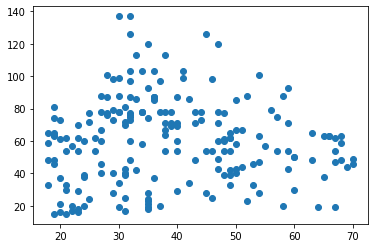

In [ ]:
x = custData["Age"]
y = custData["Annual Income (k$)"]
plt.scatter(x,y)
plt.show()

In [ ]:
# 4. Find out appropriate number of groups or clusters for data to be segmented in (use elbow method).

clusters1 = custData[["Age", "Annual Income (k$)"]]

numClusters = []

for c in range(1,10):
  km = KMeans(n_clusters=c, init="k-means++",n_init=10, max_iter=300)
  km.fit(clusters1)

  numClusters.append(km.inertia_)

print(numClusters)

[176108.77999999997, 87121.56591478697, 59486.96143928035, 39529.88796736351, 31659.353138717815, 25588.466125541127, 21871.494505548282, 18927.021389359434, 16066.94940638817]


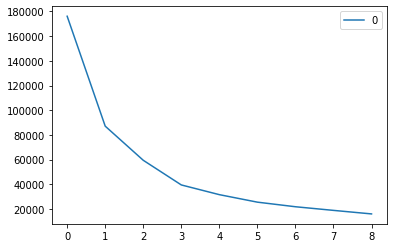

In [ ]:
pd.DataFrame(numClusters).plot()

In [ ]:
# 5. Using K Means Clustering segment the data into K groups (K was found in the previous step)

In [ ]:
X1 = clusters1.values

km1 = KMeans(n_clusters=4, init='k-means++', n_init=15, max_iter=300, 
             tol=0.0001, algorithm="elkan", random_state=100)

group1 = km1.fit(X1)

# Get the cluster labels
# labels1 = group1.labels_
labels1 = km1.predict(X1)

# Get the centroid values
centroids1 = group1.cluster_centers_

print(labels1)
print("\n", centroids1)

[1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1
 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0
 0 2 0 0 2 0 0 0 0 0 2 0 0 2 2 0 0 2 0 2 2 2 0 2 0 2 2 0 0 2 0 2 0 0 0 0 0
 2 2 2 2 2 0 0 0 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 2 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]

 [[ 55.81481481  51.77777778]
 [ 30.34693878  29.26530612]
 [ 31.95890411  72.95890411]
 [ 39.         106.5       ]]


In [ ]:
# 6. Visualize a scatter plot of the clusters

In [ ]:
clusters1 = clusters1.assign(cluster=labels1)
clusters1

,Age,Annual Income (k$),cluster
0,19,15,1
1,21,15,1
2,20,16,1
3,23,16,1
4,31,17,1
...,...,...,...
195,35,120,3
196,45,126,3
197,32,126,3
198,32,137,3


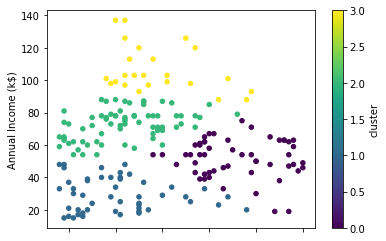

In [ ]:
clusters1.plot.scatter(x="Age", y="Annual Income (k$)", c='cluster',colormap='viridis')

[0 1 2 3]


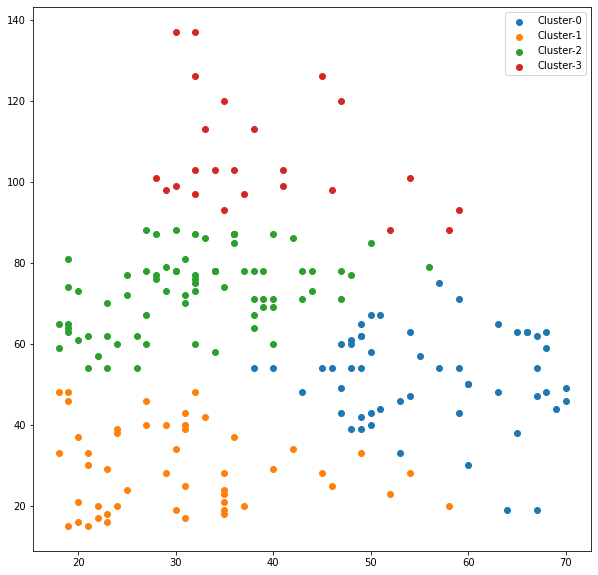

In [ ]:
labels = np.unique(labels1)
print(labels)

fig =plt.figure(figsize=(10,10))
scat1 = plt.subplot()
for i in labels:
    clusterData = clusters1[(clusters1["cluster"] == i)]
    clsName = "Cluster-"+str(i)
    scat1.scatter(clusterData["Age"], clusterData["Annual Income (k$)"],label=clsName)
    
plt.legend()
plt.show()

In [ ]:
custAge = clusters1[(clusters1["cluster"] == 3)]
custAge.shape, len(custAge)

((24, 3), 24)